In [23]:
#Redoing Figure 8 from the RDA paper (showcasing decadal changes in rainfall)

#Creates zonal mean of rainfall for each day and year from 1951-2007
#sorted by type - total, banded and local.

import numpy as np
import time
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy.ma as ma


In [2]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin"

In [3]:
rdapath = "APHRO_ZH_front_025deg_V1101."

In [4]:
years = np.arange(57) + 1951

In [5]:
Pchina_total = np.zeros((365,80,57))
Pchina_band = np.zeros((365,80,57))
Pchina_local = np.zeros((365,80,57))

xmin=21
xmax=72
ymin=1
ymax=80

In [7]:
for i in years:
    
    #Build filename
    filename = ferretpath + '/' + rdapath + str(i) + '.nc'
    print(filename)
    myf = nc.Dataset(filename, 'r')
    
    #Obtain fraction of different types of rainfall
    P_total =  myf.variables['P'][:]
    P_band1 = myf.variables['P_band1'][:]
    P_band2 = myf.variables['P_band2'][:]
    P_band = P_band1 + P_band2
    P_local = myf.variables['P_leftover'][:]
    
    #Find seasonal amounts of each type of rainfall
    yr=i-1951
    
    #leaving out day 366 in leap years for convenience
    Pchina_total[:,:,yr]=np.nanmean(P_total[0:365,ymin-1:ymax,xmin-1:xmax], axis=2)
    Pchina_band[:,:,yr]=np.nanmean(P_band[0:365,ymin-1:ymax,xmin-1:xmax], axis=2)
    Pchina_local[:,:,yr]=np.nanmean(P_local[0:365,ymin-1:ymax,xmin-1:xmax], axis=2)
            
    myf.close()

/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1951.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1952.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1953.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1954.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1955.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1956.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1957.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1958.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1959.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1960.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1961.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1962.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1963.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1964.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_0

In [7]:
outfilename = "Pchina_type.nc"

if os.path.exists(outfilename):
    os.remove(outfilename)
    
if os.path.exists("/Users/Siwen/Desktop/ferret/bin/" + outfilename):
    os.remove("/Users/Siwen/Desktop/ferret/bin/" + outfilename)

#Save as netCDF file
outfile = nc.Dataset(outfilename, "w", format="NETCDF4")

In [8]:
#create dimensions
days_dim = outfile.createDimension('days', None)
lat_dim = outfile.createDimension('lat', 80)
yr_dim = outfile.createDimension('years', 57)

dim_tuple = ("days","lat","years")

#create variables inside netCDF file
Pchina_total_out = outfile.createVariable("Pchina_total", 'f8', dim_tuple)
Pchina_band_out = outfile.createVariable("Pchina_band", 'f8', dim_tuple)
Pchina_local_out = outfile.createVariable("Pchina_local",'f8', dim_tuple)


In [9]:
outfile.variables

Pchina_total_out[:] = Pchina_total
Pchina_band_out[:] = Pchina_band
Pchina_local_out[:] = Pchina_local

outfile.close()
os.rename("./" + outfilename, "/Users/Siwen/Desktop/ferret/bin/" + outfilename)

In [35]:
## UPDATED OCT 28 - alternative version of zonal mean rainfall leaving out Taiwan

ferretpath = "/Users/Siwen/Desktop/ferret/bin"
rdapath = "APHRO_ZH_front_025deg_V1101."
years = np.arange(57) + 1951

Pchina_total_notaiwan = np.zeros((365,80,57))
Pchina_band_notaiwan = np.zeros((365,80,57))
Pchina_local_notaiwan = np.zeros((365,80,57))

xmin=21
xmax=72
ymin=1
ymax=80

In [36]:
#specialized function to remove Taiwan from maps of daily rainfall (can skew zonal means)
def remove_taiwan(P): 
    P_notaiwan = np.copy(P)
    P_notaiwan[:, :25, 60:]=np.NaN
    P_notaiwan[:, :18, 56:]=np.NaN
    return P_notaiwan

In [37]:
for i in years:
    
    #Build filename
    filename = ferretpath + '/' + rdapath + str(i) + '.nc'
    print(filename)
    myf = nc.Dataset(filename, 'r')
    
    #Obtain fraction of different types of rainfall
    P_total =  myf.variables['P'][:]
    P_band1 = myf.variables['P_band1'][:]
    P_band2 = myf.variables['P_band2'][:]
    P_band = P_band1 + P_band2
    P_local = myf.variables['P_leftover'][:]
    
    #Find seasonal amounts of each type of rainfall
    yr=i-1951
    
    ## NEW MODULE 10/28 - remove Taiwan from zonal average, since Taiwan rainfall very distinct
    P_total_notaiwan = remove_taiwan(P_total)
    P_band_notaiwan = remove_taiwan(P_band)
    P_local_notaiwan = remove_taiwan(P_local)
    
    #leaving out day 366 in leap years for convenience
    Pchina_total_notaiwan[:,:,yr]=np.nanmean(P_total_notaiwan[0:365,ymin-1:ymax,xmin-1:xmax], axis=2)
    Pchina_band_notaiwan[:,:,yr]=np.nanmean(P_band_notaiwan[0:365,ymin-1:ymax,xmin-1:xmax], axis=2)
    Pchina_local_notaiwan[:,:,yr]=np.nanmean(P_local_notaiwan[0:365,ymin-1:ymax,xmin-1:xmax], axis=2)
            
    myf.close()

/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1951.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1952.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1953.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1954.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1955.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1956.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1957.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1958.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1959.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1960.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1961.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1962.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1963.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1964.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_0

In [38]:
P_total_notaiwan_ma = ma.array(P_total_notaiwan, mask = np.isnan(P_total_notaiwan))
P_total_ma = ma.array(P_total, mask = np.isnan(P_total))

In [39]:
print(P_total_notaiwan_ma[200,:,:])

[[1.7020236253738403 1.6060148477554321 1.2361640930175781 ..., -- -- --]
 [2.0787229537963867 2.1230556964874268 1.8485132455825806 ..., -- -- --]
 [2.539463758468628 2.7415220737457275 2.6839699745178223 ..., -- -- --]
 ..., 
 [1.4370588064193726 1.4790623188018799 1.3804960250854492 ..., 0.0 0.0 --]
 [1.4823989868164062 1.220218539237976 0.8356295824050903 ..., 0.0 0.0 0.0]
 [2.0226376056671143 1.4228355884552002 1.0950720310211182 ..., 0.0 0.0 0.0]]


<IPython.core.display.Javascript object>


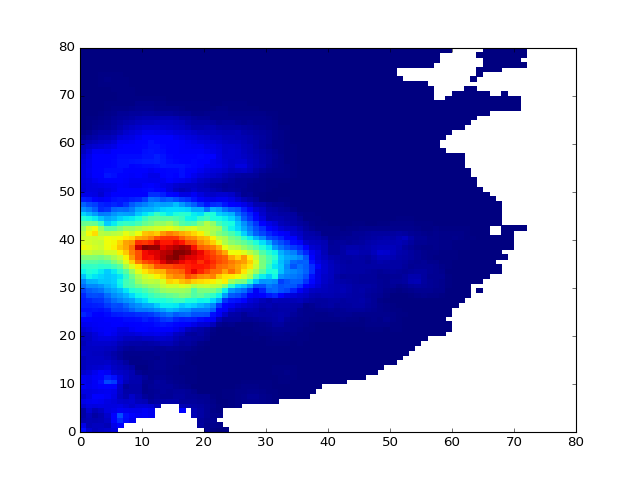

In [40]:
fig1 = plt.figure()
plt.pcolormesh(P_total_notaiwan_ma[250,:,:])

<IPython.core.display.Javascript object>


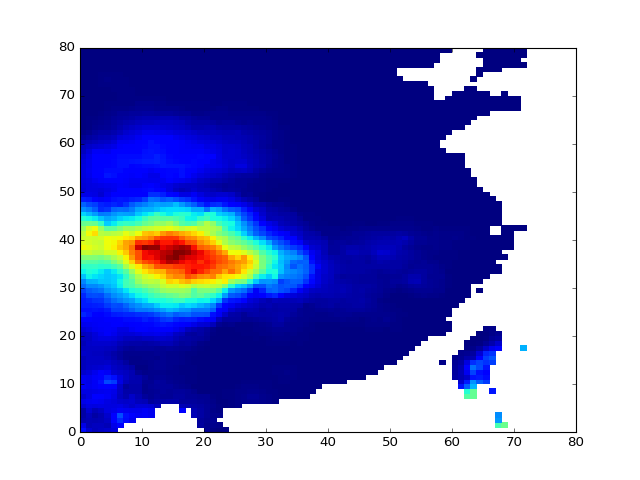

In [41]:
fig2 = plt.figure()
plt.pcolormesh(P_total_ma[250,:,:])

In [49]:
# checking module - verifies that zonal averages are changing as we would expect
print(Pchina_total[250,:,56])
print(Pchina_total_notaiwan[250,:,56])

[  2.87602995e-01   6.97114769e+00   3.77704859e+00   2.86862373e+00
   4.75328952e-01   3.55974560e-01   4.07325648e-01   2.04337563e+00
   1.91135775e+00   1.21925878e+00   1.23499980e+00   7.07406665e-01
   7.15058126e-01   8.42546768e-01   8.36888484e-01   6.07833892e-01
   4.63183401e-01   5.69827137e-01   1.68087023e-01   1.46666275e-01
   1.61302603e-01   2.05587310e-01   3.92527395e-01   7.36626404e-01
   1.01806377e+00   1.32071472e+00   1.61201039e+00   2.15728318e+00
   3.10151410e+00   4.03366426e+00   5.22403405e+00   6.12506325e+00
   7.04650337e+00   7.55374521e+00   7.76544080e+00   8.08889358e+00
   7.69421874e+00   7.25451584e+00   6.04856484e+00   5.26573835e+00
   4.61987241e+00   3.93459350e+00   3.28766734e+00   2.96839467e+00
   2.34071919e+00   2.04874782e+00   1.52610874e+00   9.06315464e-01
   5.31257507e-01   3.54775118e-01   2.32041055e-01   2.13756516e-01
   2.82862230e-01   4.09865323e-01   5.81067179e-01   7.27105401e-01
   7.03288527e-01   7.10805205e-01

In [50]:
outfilename = "Pchina_type_notaiwan.nc"

if os.path.exists(outfilename):
    os.remove(outfilename)
    
if os.path.exists("/Users/Siwen/Desktop/ferret/bin/" + outfilename):
    os.remove("/Users/Siwen/Desktop/ferret/bin/" + outfilename)

#Save as netCDF file
outfile = nc.Dataset(outfilename, "w", format="NETCDF4")

In [51]:
#create dimensions
days_dim = outfile.createDimension('days', None)
lat_dim = outfile.createDimension('lat', 80)
yr_dim = outfile.createDimension('years', 57)

dim_tuple = ("days","lat","years")

#create variables inside netCDF file
Pchina_total_out = outfile.createVariable("Pchina_total", 'f8', dim_tuple)
Pchina_band_out = outfile.createVariable("Pchina_band", 'f8', dim_tuple)
Pchina_local_out = outfile.createVariable("Pchina_local",'f8', dim_tuple)

In [52]:
Pchina_total_out[:] = Pchina_total_notaiwan
Pchina_band_out[:] = Pchina_band_notaiwan
Pchina_local_out[:] = Pchina_local_notaiwan

outfile.close()
os.rename("./" + outfilename, "/Users/Siwen/Desktop/ferret/bin/" + outfilename)